In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import scipy
import plotly.express as px
import plotly.figure_factory as ff
%matplotlib inline

In [2]:
heart_fail = pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [3]:
heart_fail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [4]:
heart_fail.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [5]:
#There are many columns that can be a category. So let's change them.

heart_fail[["anaemia", "diabetes", "high_blood_pressure", "sex", "smoking", "DEATH_EVENT"]] = heart_fail[["anaemia", "diabetes", "high_blood_pressure", "sex", "smoking", "DEATH_EVENT"]].astype("category")

In [6]:
heart_fail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   age                       299 non-null    float64 
 1   anaemia                   299 non-null    category
 2   creatinine_phosphokinase  299 non-null    int64   
 3   diabetes                  299 non-null    category
 4   ejection_fraction         299 non-null    int64   
 5   high_blood_pressure       299 non-null    category
 6   platelets                 299 non-null    float64 
 7   serum_creatinine          299 non-null    float64 
 8   serum_sodium              299 non-null    int64   
 9   sex                       299 non-null    category
 10  smoking                   299 non-null    category
 11  time                      299 non-null    int64   
 12  DEATH_EVENT               299 non-null    category
dtypes: category(6), float64(3), int64(4)
memory usage:

# Check for outliers:

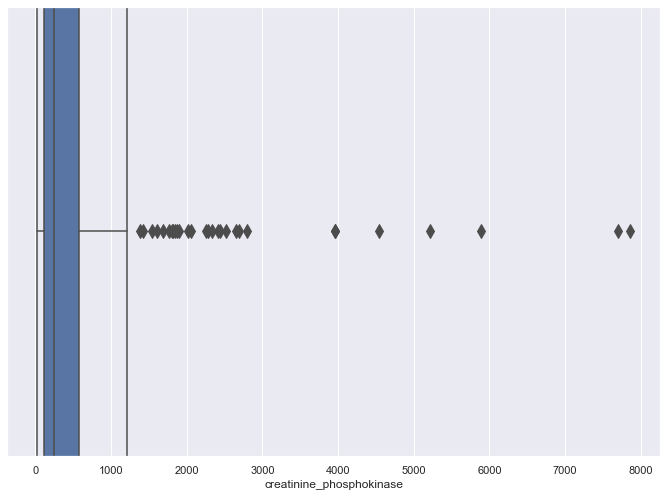

In [67]:
fig = sns.boxplot(x = heart_fail.creatinine_phosphokinase, width = 10, fliersize=10)
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.show()

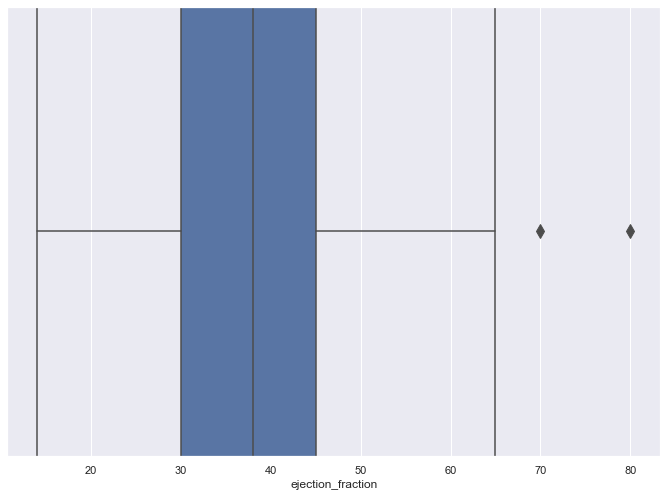

In [8]:
fig = sns.boxplot(x = heart_fail.ejection_fraction, width = 10, fliersize=10)
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.show()

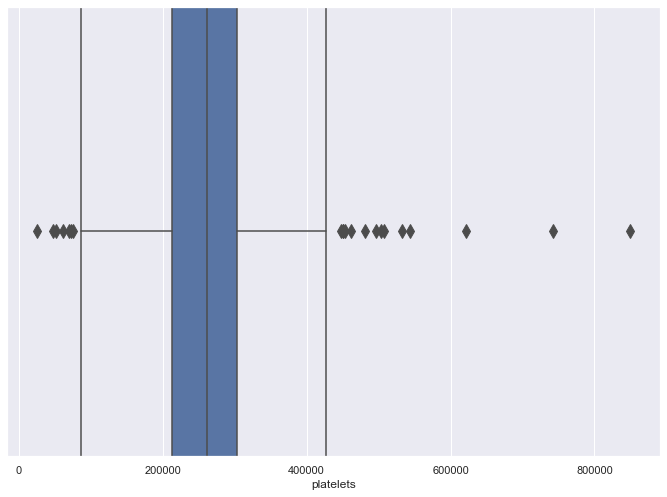

In [9]:
fig = sns.boxplot(x = heart_fail.platelets, width = 10, fliersize=10)
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.show()

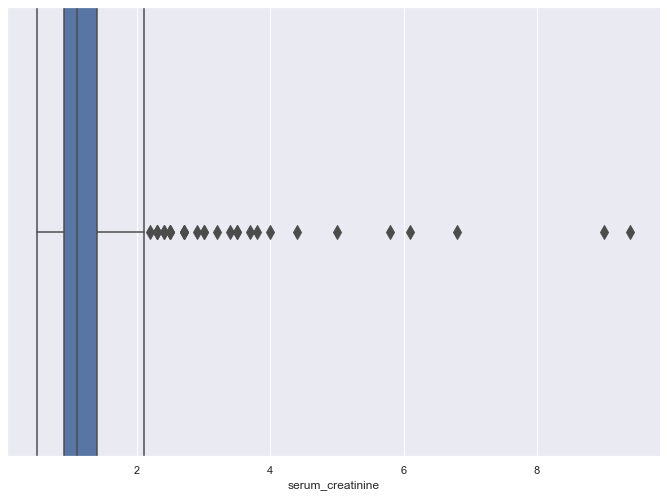

In [10]:
fig = sns.boxplot(x = heart_fail.serum_creatinine, width = 10, fliersize=10)
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.show()

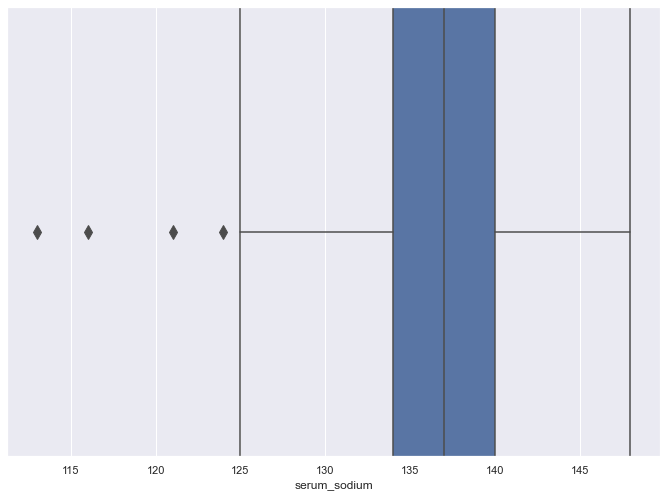

In [11]:
fig = sns.boxplot(x = heart_fail.serum_sodium, width = 10, fliersize=10)
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.show()

    -For creatinine phosphokinase (CPK) the normal values are between 10 to 120 micrograms per liter (mcg/L). The fact we have values far greater than this is beacause these elevations can be classified as as mild, moderate, or severe. For severe elevations, the values can exceed 10,000 mcg/L.
   
    - Ejection fraction (LVEF) ranges from 55% to 70%. Higher than 75% – Can indicate a heart condition like hypertrophic cardiomyopathy, a common cause of sudden cardiac arrest.
   
    -For platelets, normal count ranges from 150,000 to 450,000 platelets per microliter of blood. Having more than 450,000 platelets is a condition called thrombocytosis; having less than 150,000 is known as thrombocytopenia
    
    -The typical range for serum creatinine is: For adult men, 0.74 to 1.35 mg/dL (65.4 to 119.3 micromoles/L) For adult women, 0.59 to 1.04 mg/dL (52.2 to 91.9 micromoles/L) Creatinine levels of 2.0 or more in infants and 5.0 or more in adults may indicate severe kidney damage.People who are dehydrated may have elevated creatinine levels.

    -For serum sodium, normal ranges are between 135 and 145 mEq/L. The fact we have data as low as < 115 mEq/L is not an error, but -what is called- "Severe hyponatremia". We will not be removing these.
    
So as we can see, there are no outliers in the data. All values outside the box, mean some kind of underlying condition is present.    

# Lets explore our data

## In this section, we are going to look for insights in Age, Gender, Diabetes and Smoking:

### Intuitively, when we deal with heart failure, we look into age and gender first. so lets dive into these to get some insights

In [12]:
sns.set(rc={"axes.facecolor":"#283747", "axes.grid":False,'xtick.labelsize':14,'ytick.labelsize':14})


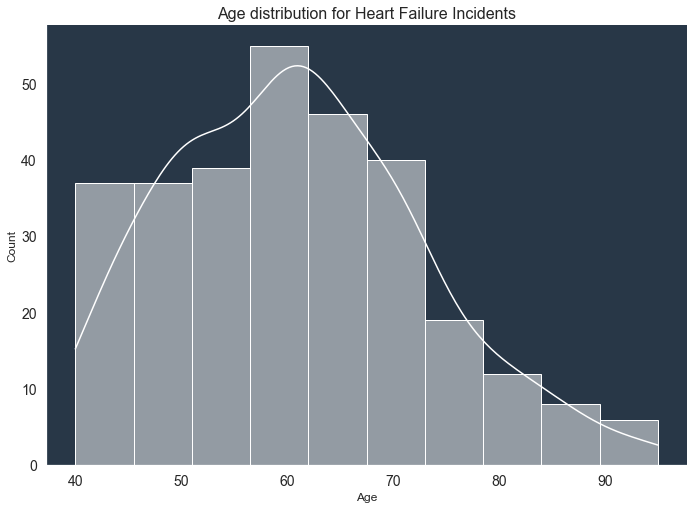

In [13]:
age = heart_fail["age"]

age_hist = sns.displot(age, kde = True, height = 7, aspect = 1.4, color = 'w')
age_hist.set_axis_labels(x_var = "Age")

plt.title("Age distribution for Heart Failure Incidents", size = 16)

plt.show()

#####    As the above chart shows, the age most sensitive to heart failure, is between 55 and 70. Above 40 and bellow 55 is riskier than above 70

In [14]:
sex_groups = heart_fail.groupby("sex")
male = sex_groups.get_group(1)
female = sex_groups.get_group(0)

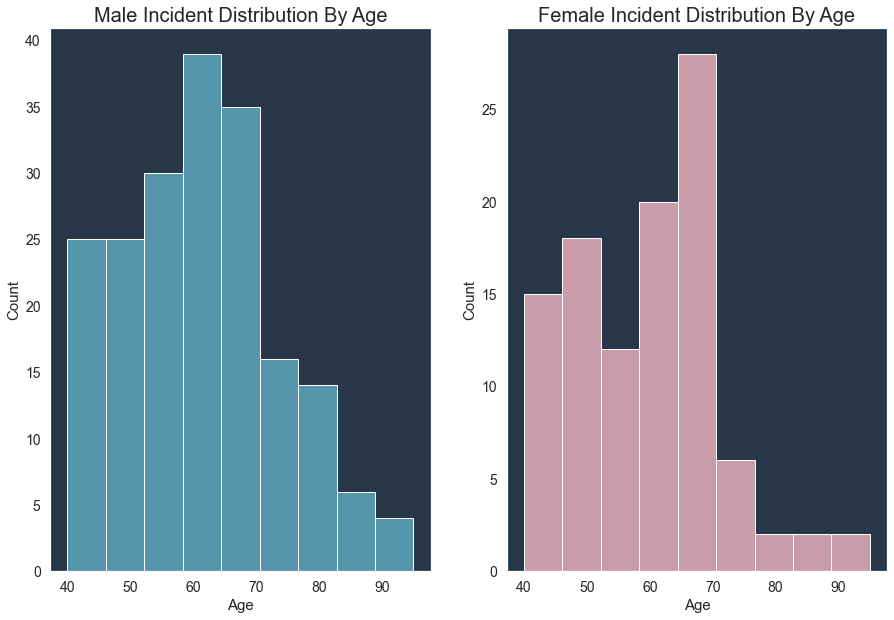

In [15]:
male_age = male["age"]
female_age = female["age"]

fig , ax = plt.subplots(nrows=1, ncols=2 , figsize = (15,10))

ax1 = sns.histplot(male_age, color = "c", ax = ax[0])
ax2 = sns.histplot(female_age, color = "pink", ax= ax[1])

ax1.title.set_text('Male Incident Distribution By Age')
ax1.title.set_size(20)
ax1.xaxis.set_label_text('Age', size=15)
ax1.yaxis.set_label_text('Count', size=15)


ax2.title.set_text('Female Incident Distribution By Age')
ax2.title.set_size(20)
ax2.xaxis.set_label_text('Age', size=15)
ax2.yaxis.set_label_text('Count', size=15)
plt.show()

##### For both Males and Females, the most incidents happen at ages between 60 and 70.



### Males seem to have more Incidents across the board:

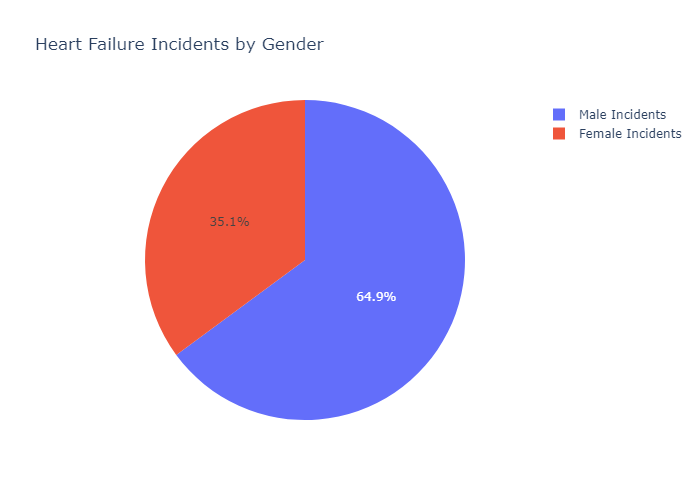

In [38]:
male_cases = heart_fail[heart_fail["sex"] == 1]
female_cases = heart_fail[heart_fail["sex"] == 0]

labels = ["Male Incidents", "Female Incidents"]
values = [len(male_cases), len(female_cases)]

fig = go.Figure(go.Pie(labels=labels, values=values))
fig.update_layout(title_text = "Heart Failure Incidents by Gender")

fig.show('png')

##### Males have almost double the amount of heart failure incidents compared to females.

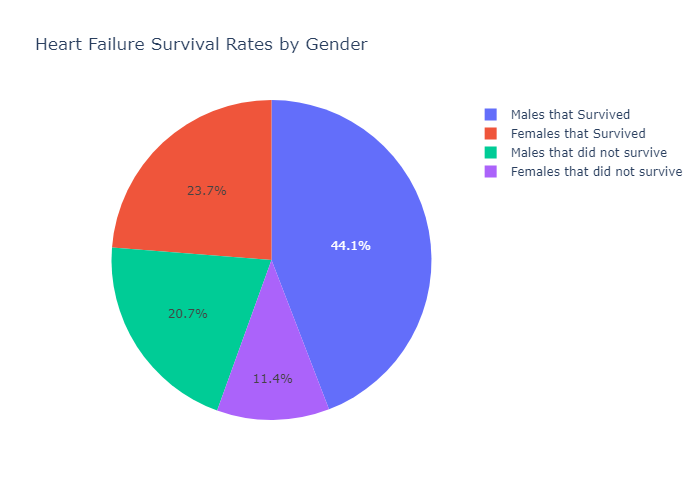

In [39]:
males = heart_fail[heart_fail["sex"] == 1]
females = heart_fail[heart_fail["sex"] == 0]

males_survived = males.where(heart_fail["DEATH_EVENT"] == 0).dropna()
males_death = males.where(heart_fail["DEATH_EVENT"] == 1).dropna()

females_survived = females.where(heart_fail["DEATH_EVENT"] == 0).dropna()
females_death = females.where(heart_fail["DEATH_EVENT"] == 1).dropna()

labels = ["Males that Survived", "Males that did not survive", "Females that Survived", "Females that did not survive"]
values = [len(males_survived), len(males_death), len(females_survived), len(females_death)]

fig = go.Figure(go.Pie(labels = labels, values = values))
fig.update_layout(title_text = "Heart Failure Survival Rates by Gender")

fig.show('png')

### Let's dive into the role diabetes plays in heart failure incidents

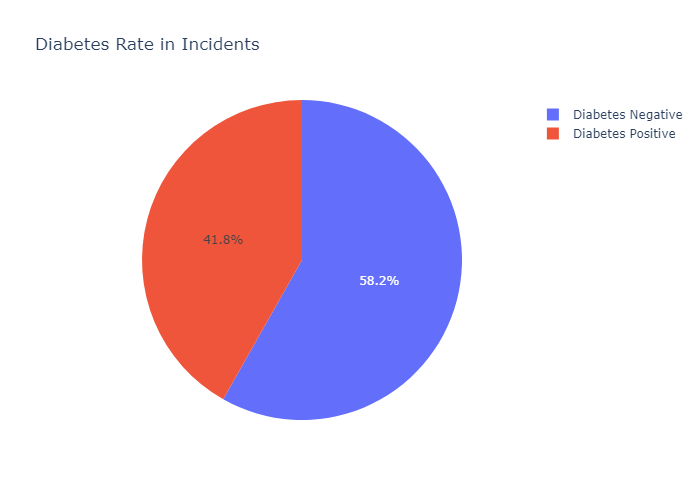

In [43]:
diabetes_positive = heart_fail[heart_fail["diabetes"] == 1]
diabetes_negative = heart_fail[heart_fail["diabetes"] == 0]

labels = ["Diabetes Positive", "Diabetes Negative"]
values = [len(diabetes_positive), len(diabetes_negative)]

fig = go.Figure(go.Pie(labels=labels, values=values))
fig.update_layout(title_text = "Diabetes Rate in Incidents")

fig.show('png')

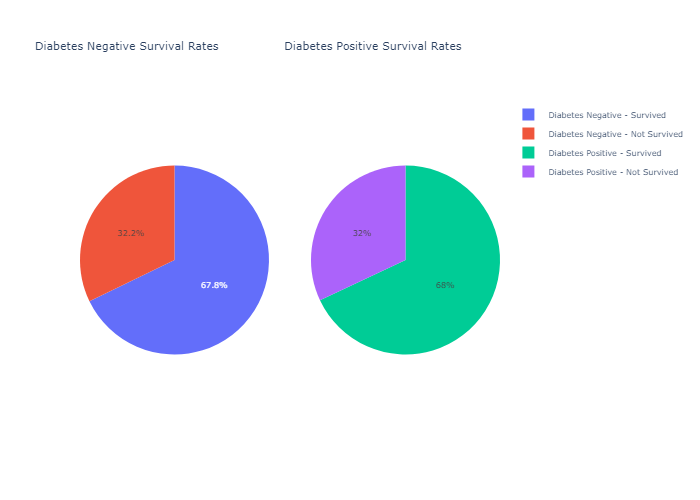

In [56]:
diabetes_neg_survival = diabetes_negative.where(diabetes_negative['DEATH_EVENT'] == 0).dropna()
diabetes_neg_death = diabetes_negative.where(diabetes_negative['DEATH_EVENT'] == 1).dropna()
diabetes_pos_survival = diabetes_positive.where(diabetes_positive['DEATH_EVENT'] == 0).dropna()
diabetes_pos_death = diabetes_positive.where(diabetes_positive['DEATH_EVENT'] == 1).dropna()

labels_positive = ["Diabetes Positive - Survived", "Diabetes Positive - Not Survived"]
values_positive = [len(diabetes_pos_survival), len(diabetes_pos_death)]
labels_negative = ["Diabetes Negative - Survived", "Diabetes Negative - Not Survived"]
values_negative = [len(diabetes_neg_survival), len(diabetes_neg_death)]

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])

fig.add_trace(go.Pie(labels=labels_negative, values=values_negative), 1, 1)

fig.add_trace(go.Pie(labels=labels_positive, values=values_positive), 1, 2)


fig.update_traces(hoverinfo="label+value+percent")
fig.update_layout(title_text = "Diabetes Negative Survival Rates                 Diabetes Positive Survival Rates", font_size=8)

fig.show('png')


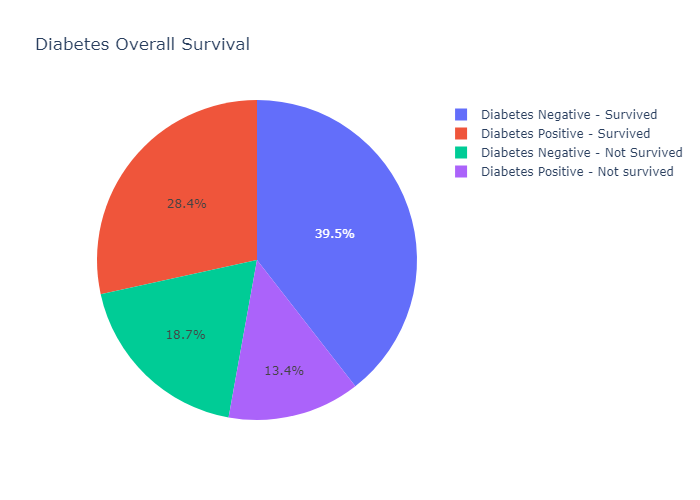

In [45]:
labels = ["Diabetes Negative - Survived", "Diabetes Negative - Not Survived", "Diabetes Positive - Survived", "Diabetes Positive - Not survived"]
values = [len(diabetes_neg_survival), len(diabetes_neg_death), len(diabetes_pos_survival), len(diabetes_pos_death)]

fig = go.Figure([go.Pie(labels = labels, values = values)])
fig.update_layout(title = "Diabetes Overall Survival")
fig.show('png')

### Let's dive into the role smoking plays in heart failure incidents

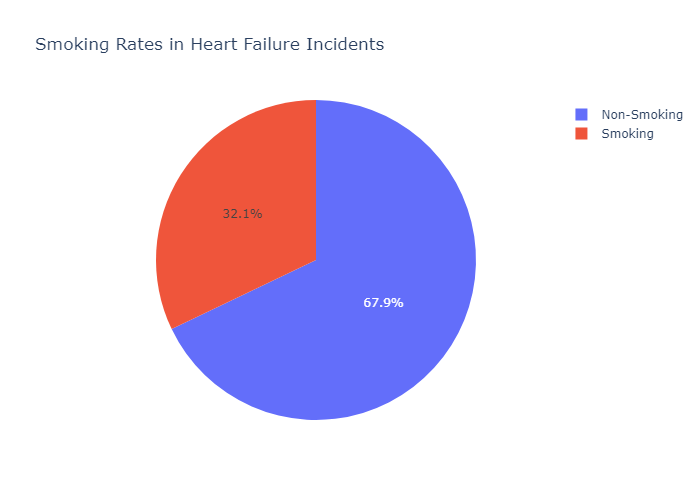

In [57]:
smoking = heart_fail[heart_fail["smoking"] == 1]
non_smoking = heart_fail[heart_fail["smoking"] == 0]

labels = ["Smoking", "Non-Smoking"]
values = [len(smoking), len(non_smoking)]

fig = go.Figure(go.Pie(labels=labels, values=values))
fig.update_layout(title_text = "Smoking Rates in Heart Failure Incidents")

fig.show('png')


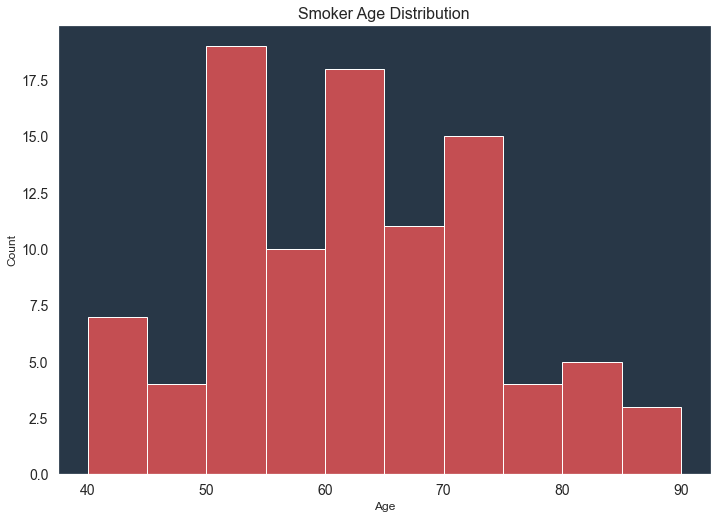

In [22]:
fig, ax = plt.subplots()

ax.hist(smoking['age'], label = ['Smokers', 'Non-Smokers'], color = 'r')
ax.set_xlabel('Age')
ax.set_ylabel('Count')
ax.set_title('Smoker Age Distribution', size = 16)

plt.show()

##### Most amount of smokers is found between ages 50 and 75

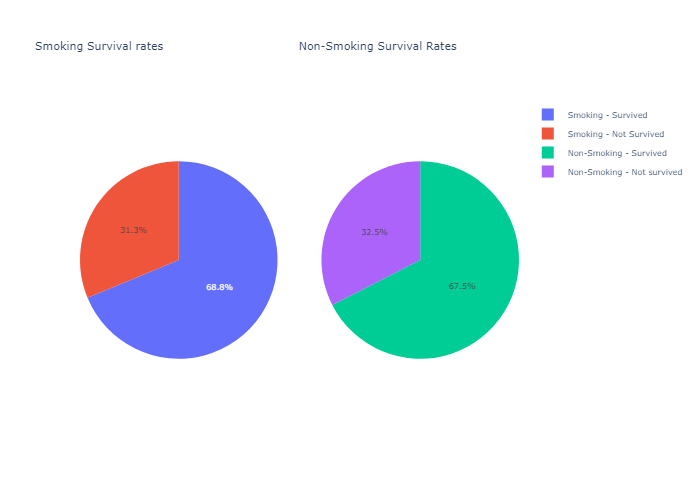

In [60]:
smoking_survival = smoking.where(smoking['DEATH_EVENT'] == 0).dropna()
smoking_death = smoking.where(smoking['DEATH_EVENT'] == 1).dropna()

non_smoking_survival = non_smoking.where(non_smoking['DEATH_EVENT'] == 0).dropna()
non_smoking_death = non_smoking.where(non_smoking['DEATH_EVENT'] == 1).dropna()

labels_smoking = ["Smoking - Survived", "Smoking - Not Survived"]
values_smoking = [len(smoking_survival), len(smoking_death)]
labels_non_smoking = ["Non-Smoking - Survived", "Non-Smoking - Not survived"]
values_non_smoking = [len(non_smoking_survival), len(non_smoking_death)]


fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])

fig.add_trace(go.Pie(labels=labels_smoking, values=values_smoking), 1, 1)

fig.add_trace(go.Pie(labels=labels_non_smoking, values=values_non_smoking), 1, 2)


fig.update_traces(hoverinfo="label+value+percent")
fig.update_layout(title_text = "Smoking Survival rates                                   Non-Smoking Survival Rates", font_size=8)

fig.show('png')


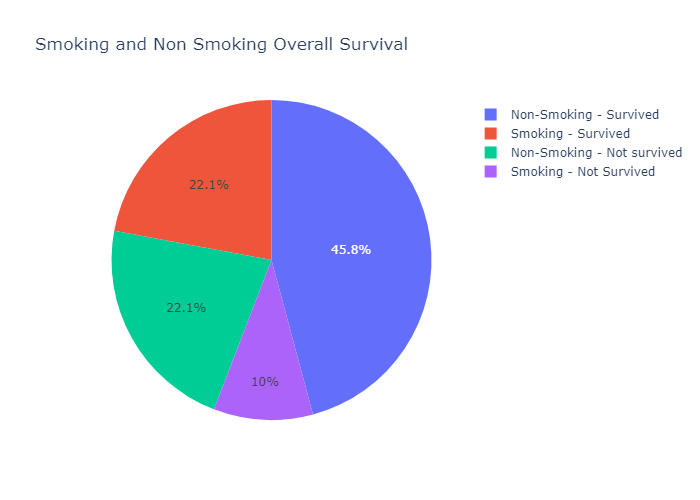

In [61]:
labels = ["Smoking - Survived", "Smoking - Not Survived", "Non-Smoking - Survived", "Non-Smoking - Not survived"]
values = [len(smoking_survival), len(smoking_death), len(non_smoking_survival), len(non_smoking_death)]

fig = go.Figure([go.Pie(labels = labels, values = values)])
fig.update_layout(title = "Smoking and Non Smoking Overall Survival")
fig.show('png')

### Let's see the combination of Diabetes, Smoking and Age :

We need to consider if having diabetes and smoking negatively impacts the survival rates.

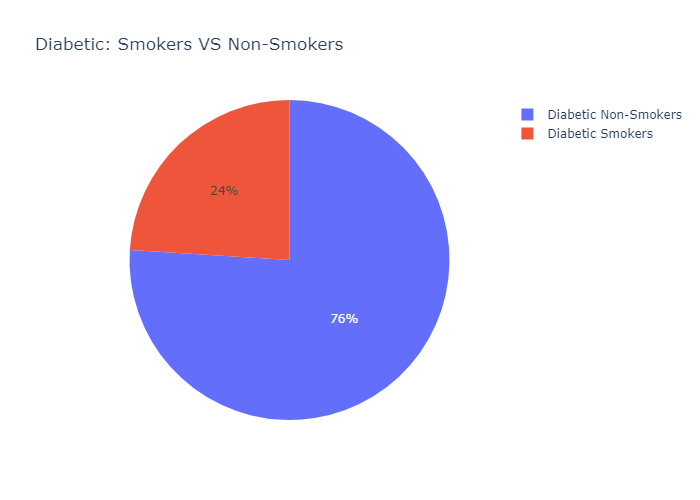

In [62]:
diabetes_smoking = smoking.where(smoking['diabetes'] == 1).dropna()
diabetes_non_smoking = non_smoking.where(non_smoking['diabetes'] == 1).dropna()
labels = ['Diabetic Smokers', 'Diabetic Non-Smokers']
values = [len(diabetes_smoking), len(diabetes_non_smoking)]

fig = go.Figure(go.Pie(labels = labels, values = values))
fig.update_layout(title = "Diabetic: Smokers VS Non-Smokers")
fig.show('png')

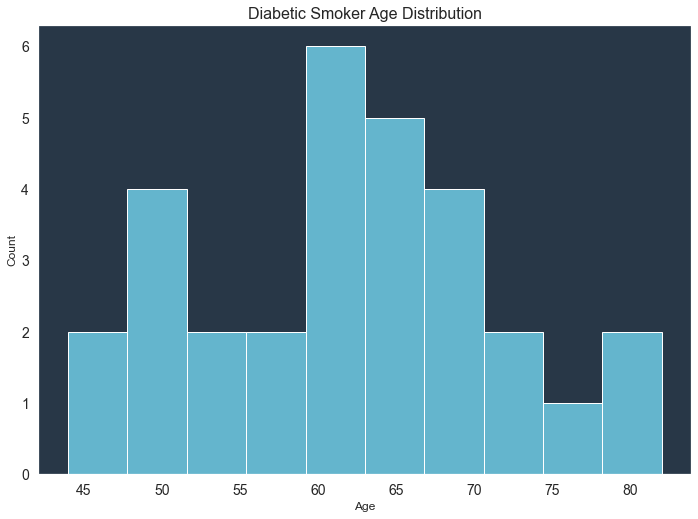

In [26]:
fig, ax = plt.subplots()

ax.hist(diabetes_smoking['age'], label = ['Diabetic Smokers', 'Diabetic Non-Smokers'], color = 'c')
ax.set_xlabel('Age')
ax.set_ylabel('Count')
ax.set_title('Diabetic Smoker Age Distribution', size = 16)

plt.show()

##### Most amount of diabetic smokers is found between the ages 60 and 70

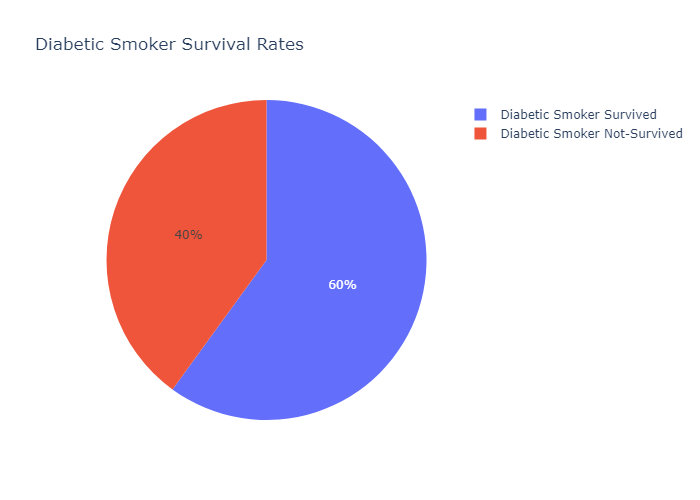

In [63]:
diabetic_smoker_survived = diabetes_smoking.where(diabetes_smoking['DEATH_EVENT'] == 0).dropna()
diabetic_smoker_death = diabetes_smoking.where(diabetes_smoking['DEATH_EVENT'] == 1).dropna()

labels = ['Diabetic Smoker Survived', 'Diabetic Smoker Not-Survived']
values = [len(diabetic_smoker_survived), len(diabetic_smoker_death)]

fig = go.Figure(go.Pie(labels = labels, values = values))
fig.update_layout(title = 'Diabetic Smoker Survival Rates')
fig.show('png')

##### Diabetic smokers survived less than diabetics OR smokers

# Lets dive into the continuous variables:

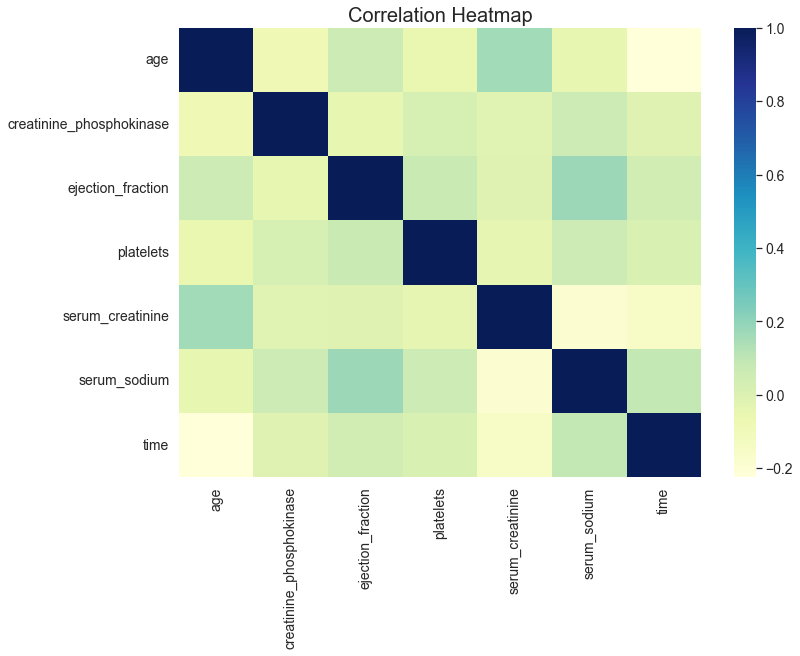

In [28]:
correlation = heart_fail.corr()
fig, ax = plt.subplots()
ax = sns.heatmap(correlation, cmap="YlGnBu")
ax.title.set_text('Correlation Heatmap')
ax.title.set_size(20)
plt.show()

##### There is very low correlation between our continuous variables. That means they do not affect each other enough to explore relationships between them

### Let's see how creatinine phosphorokinase affects incidents:

In [29]:
normal_crp = heart_fail.where((heart_fail['creatinine_phosphokinase'] >= 10) & (heart_fail['creatinine_phosphokinase'] <= 120)).dropna()

high_crp = heart_fail.where((heart_fail['creatinine_phosphokinase'] > 120) & (heart_fail['creatinine_phosphokinase'] <= 1000)).dropna()

sev_high_crp = heart_fail.where((heart_fail['creatinine_phosphokinase'] > 1000)).dropna()


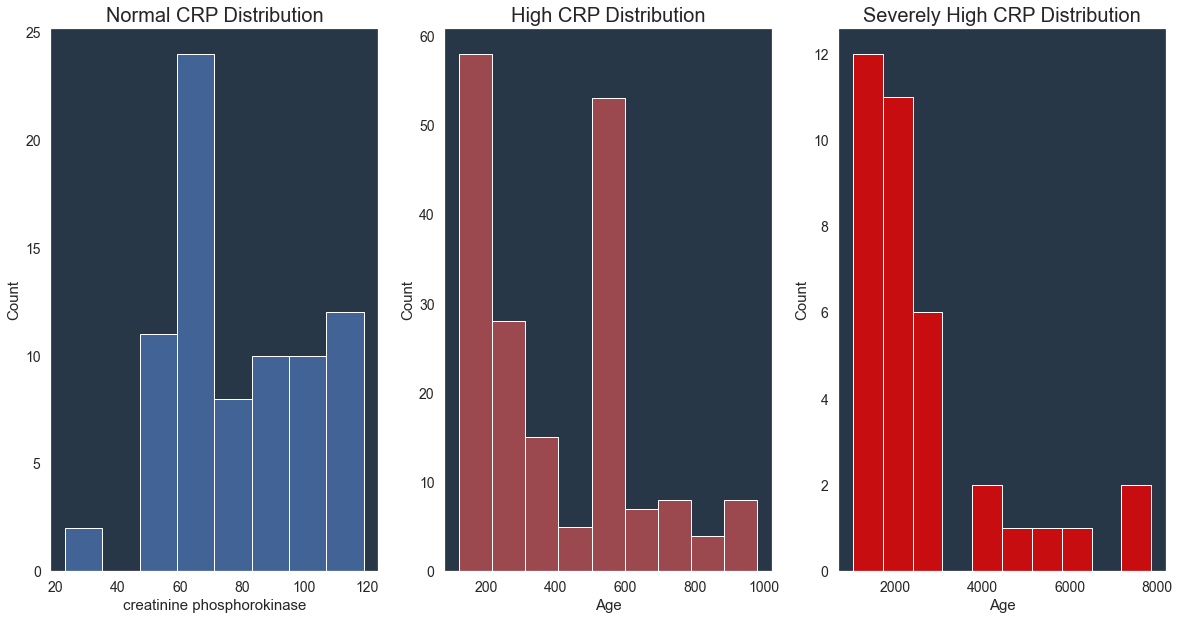

In [30]:
fig , ax = plt.subplots(nrows=1, ncols=3 , figsize = (20,10))

ax1 = sns.histplot(normal_crp['creatinine_phosphokinase'], color = "b", ax = ax[0])
ax2 = sns.histplot(high_crp['creatinine_phosphokinase'], color = "r", ax= ax[1])
ax3 = sns.histplot(sev_high_crp['creatinine_phosphokinase'], color = "red", ax= ax[2])

ax1.title.set_text('Normal CRP Distribution')
ax1.title.set_size(20)
ax1.xaxis.set_label_text('creatinine phosphorokinase', size=15)
ax1.yaxis.set_label_text('Count', size=15)


ax2.title.set_text('High CRP Distribution')
ax2.title.set_size(20)
ax2.xaxis.set_label_text('Age', size=15)
ax2.yaxis.set_label_text('Count', size=15)

ax3.title.set_text('Severely High CRP Distribution')
ax3.title.set_size(20)
ax3.xaxis.set_label_text('Age', size=15)
ax3.yaxis.set_label_text('Count', size=15)




plt.show()

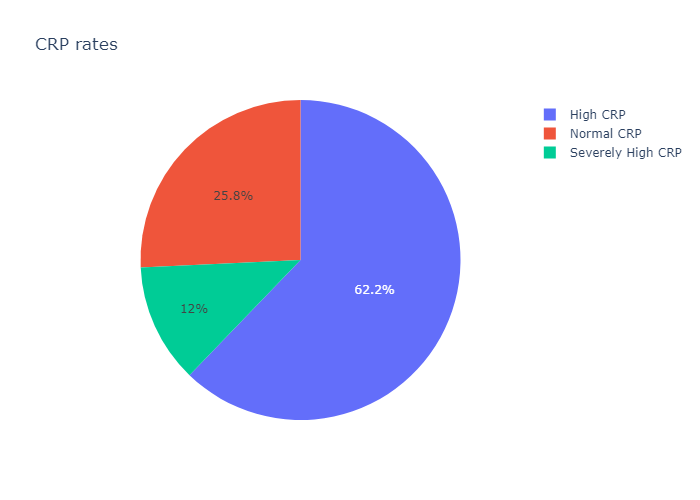

In [64]:
labels = ['Normal CRP', 'High CRP', 'Severely High CRP']
values = [len(normal_crp), len(high_crp), len(sev_high_crp)]

fig = go.Figure(go.Pie(labels = labels, values = values))
fig.update_layout(title = 'CRP rates')
fig.show('png')

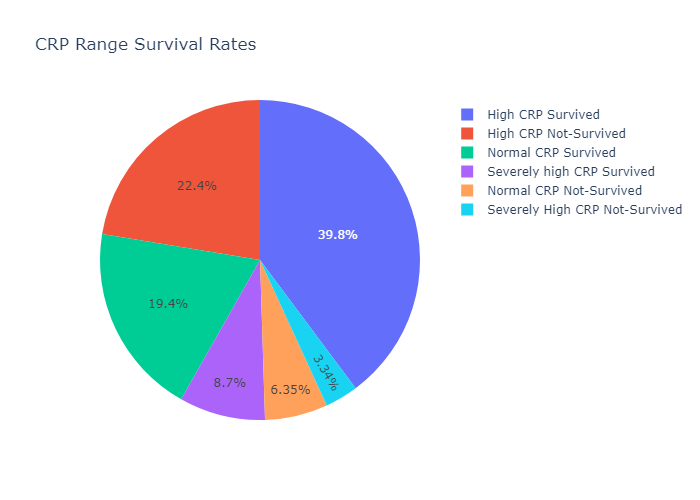

In [65]:
normal_crp_survived = normal_crp.where(normal_crp['DEATH_EVENT'] == 0).dropna()
normal_crp_death = normal_crp.where(normal_crp['DEATH_EVENT'] == 1).dropna()

high_crp_survived = high_crp.where(high_crp['DEATH_EVENT'] == 0).dropna()
high_crp_death = high_crp.where(high_crp['DEATH_EVENT'] == 1).dropna()

sev_high_crp_survived = sev_high_crp.where(sev_high_crp['DEATH_EVENT'] == 0).dropna()
sev_high_crp_death = sev_high_crp.where(sev_high_crp['DEATH_EVENT'] == 1).dropna()

labels = ['Normal CRP Survived', 'Normal CRP Not-Survived', 'High CRP Survived', 'High CRP Not-Survived', 'Severely high CRP Survived', 'Severely High CRP Not-Survived']
values = [len(normal_crp_survived), len(normal_crp_death), len(high_crp_survived), len(high_crp_death), len(sev_high_crp_survived), len(sev_high_crp_death)]

fig = go.Figure(go.Pie(labels = labels, values = values))
fig.update_layout(title = 'CRP Range Survival Rates')
fig.show('png')


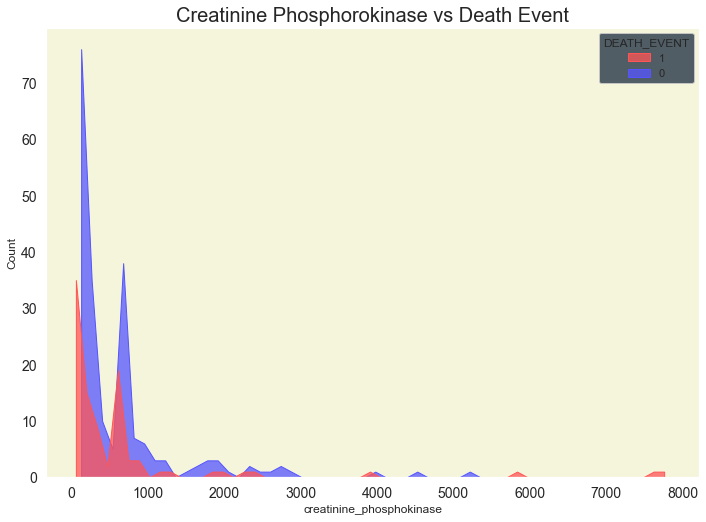

In [33]:
fig, ax = plt.subplots()
ax = sns.histplot(heart_fail, x=heart_fail['creatinine_phosphokinase'], 
                  hue = 'DEATH_EVENT', 
                  hue_order=[1,0],
                  palette='seismic_r', 
                  multiple='dodge', 
                  element='poly')

ax.set_title("Creatinine Phosphorokinase vs Death Event", size=20)
ax.set_facecolor('beige')
plt.show()

##### High and Severely High values of Creatinine Phosphorokinase are ralated to more deaths

### The rest of our continuous variables:

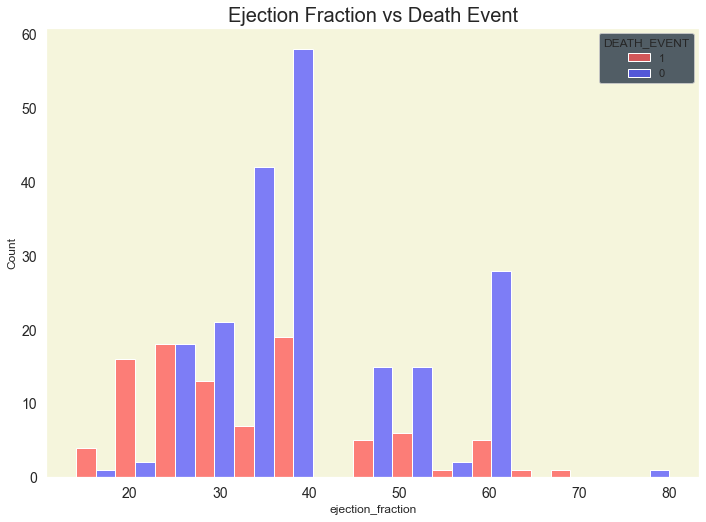

In [34]:
fig, ax = plt.subplots()
ax = sns.histplot(heart_fail, x=heart_fail['ejection_fraction'], 
                  hue = 'DEATH_EVENT', 
                  hue_order=[1,0],
                  palette='seismic_r', 
                  multiple='dodge', 
                  element='bars')

ax.set_title("Ejection Fraction vs Death Event", size=20)
ax.set_facecolor('beige')
plt.show()

##### Lower than usual percentages of ejection fraction are related to more deaths

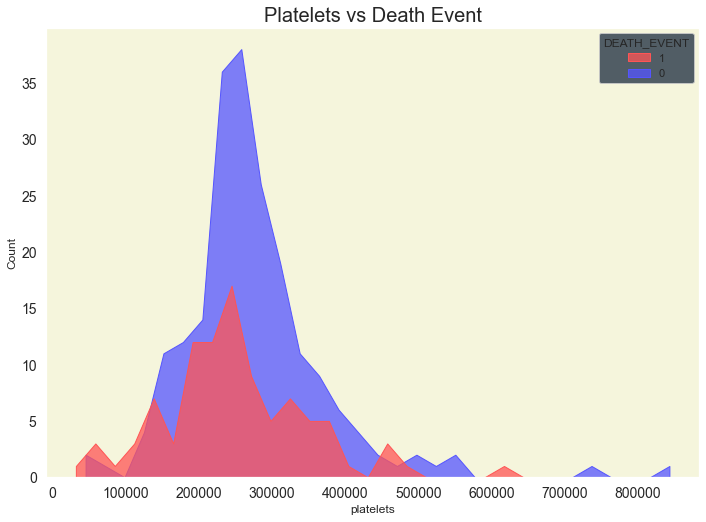

In [35]:
fig, ax = plt.subplots()
ax = sns.histplot(heart_fail, x=heart_fail['platelets'], 
                  hue = 'DEATH_EVENT', 
                  hue_order=[1,0],
                  palette='seismic_r', 
                  multiple='dodge', 
                  element='poly')

ax.set_title("Platelets vs Death Event", size=20)
ax.set_facecolor('beige')
plt.show()

##### The spike in deaths here, is happening in the normal range for platelets. this leads me to believe that this is not related to death events

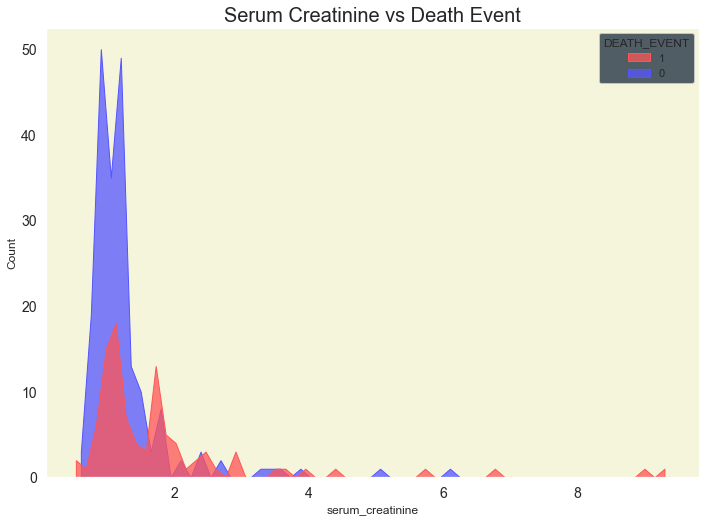

In [36]:
fig, ax = plt.subplots()
ax = sns.histplot(heart_fail, x=heart_fail['serum_creatinine'], 
                  hue = 'DEATH_EVENT', 
                  hue_order=[1,0],
                  palette='seismic_r', 
                  multiple='dodge', 
                  element='poly')

ax.set_title("Serum Creatinine vs Death Event", size=20)
ax.set_facecolor('beige')
plt.show()

##### Higher values of serum creatinine are related to more deaths

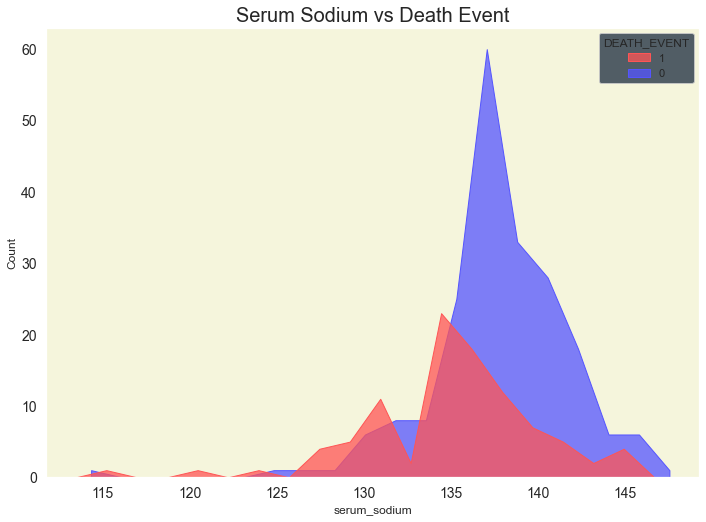

In [37]:
fig, ax = plt.subplots()
ax = sns.histplot(heart_fail, x=heart_fail['serum_sodium'], 
                  hue = 'DEATH_EVENT', 
                  hue_order=[1,0],
                  palette='seismic_r', 
                  multiple='dodge', 
                  element='poly')

ax.set_title("Serum Sodium vs Death Event", size=20)
ax.set_facecolor('beige')
plt.show()

##### Lower than usual values for serum sodium are related to more deaths than survivals